In [1]:
# Imports
import os
import subprocess
import stat
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime
sns.set(style = "white")
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")
import scipy.stats as stats
import sklearn

In [2]:
# Carregando o dataset
df = pd.read_csv("2019.csv", sep = ',', low_memory=False)

In [3]:
df.head()

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393
1,2,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410
2,3,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341
3,4,Iceland,7.494,1.380,1.624,1.026,0.591,0.354,0.118
4,5,Netherlands,7.488,1.396,1.522,0.999,0.557,0.322,0.298


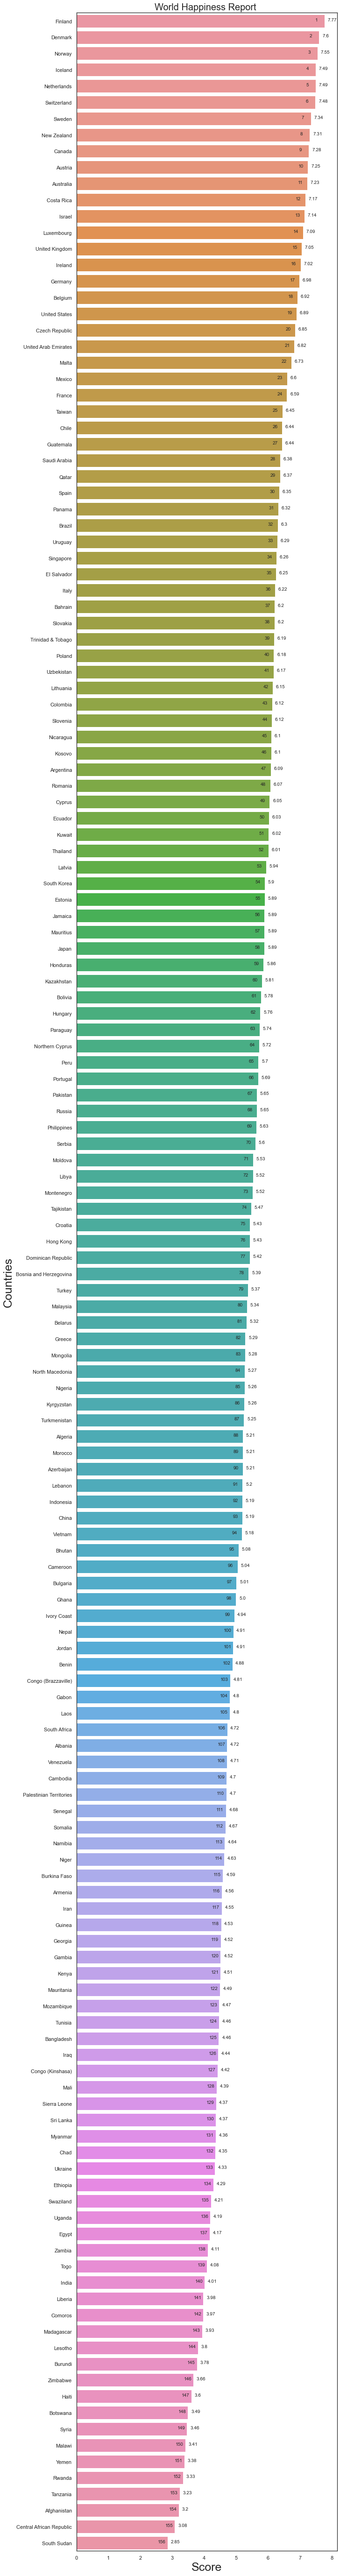

In [5]:
#Figura com o ranking- World Happiness Report 

fig, ax = plt.subplots(figsize=(10,100))
sns.barplot(y="Country or region",x="Score" ,data=df)
ax.set_title("World Happiness Report ",fontdict= {'size':20})
ax.xaxis.set_label_text("Score",fontdict= {'size':25})
ax.yaxis.set_label_text("Countries",fontdict= {'size':25})

for i, v in enumerate(round(df["Score"],2)):
    plt.text(v+0.1 , i, str(v))
for i, v in enumerate(df["Score"]):
    plt.text(v-0.3 , i, str(i+1))
    
plt.show()

# Salvando o plot
fig.savefig("plot/barplot-World Happiness Report.png")

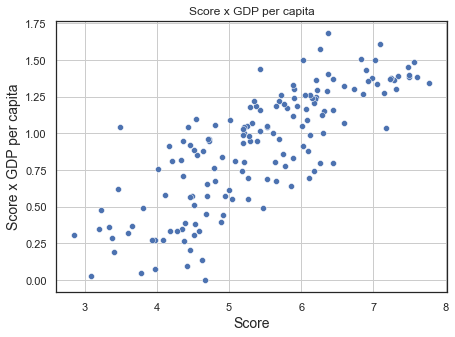

In [4]:
#Nesta figura nota-se que existe uma tendência de países com maiores PIBs também terem uma população mais feliz

fig, ax = plt.subplots(figsize=(7,5))
sns.scatterplot(df["Score"], df["GDP per capita"], data=df)
ax.set_title("Score x GDP per capita",fontdict= {'size':12})
ax.xaxis.set_label_text("Score",fontdict= {'size':14})
ax.yaxis.set_label_text("Score x GDP per capita",fontdict= {'size':14})
plt.grid(True)
plt.show()

fig.savefig("plot/Score x GDP per capita.png")





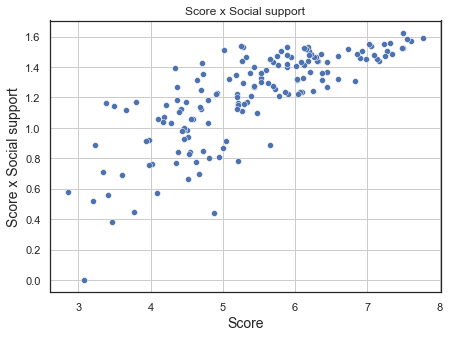

In [7]:
# Também temos uma tendencia entre Suporte Social e uma população mais feliz (todos os países com os mais altos níveis de 
# felicidade possuem um Suporte Social bastante elevado, porém temos muitos países com Suporte Social elevado e com Score 
# mediano )

fig, ax = plt.subplots(figsize=(7,5))
sns.scatterplot(df["Score"], df["Social support"], data=df)
ax.set_title("Score x Social support",fontdict= {'size':12})
ax.xaxis.set_label_text("Score",fontdict= {'size':14})
ax.yaxis.set_label_text("Score x Social support",fontdict= {'size':14})
plt.grid(True)
plt.show()

fig.savefig("plot/Social support.png")

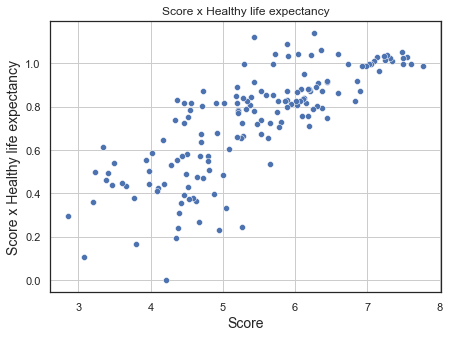

In [8]:
#Embora exista uma tendência de países com uma alta Expectativa de Vida Saudável terem um Score mais elevado, 
# alguns dos países com as maiores Expectativa de Vida Saudável possuem um Score mediano

fig, ax = plt.subplots(figsize=(7,5))
sns.scatterplot(df["Score"], df["Healthy life expectancy"], data=df)
ax.set_title("Score x Healthy life expectancy",fontdict= {'size':12})
ax.xaxis.set_label_text("Score",fontdict= {'size':14})
ax.yaxis.set_label_text("Score x Healthy life expectancy",fontdict= {'size':14})
plt.grid(True)
plt.show()

fig.savefig("plot/Healthy life expectancy.png")


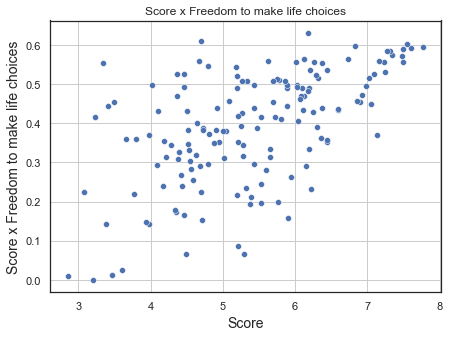

In [9]:
#Embora os países com Score mais elevados possuírem um alto nível de Liberdade,
#não noto uma tendência clara entre os dois fatores

fig, ax = plt.subplots(figsize=(7,5))
sns.scatterplot(df["Score"], df["Freedom to make life choices"], data=df)
ax.set_title("Score x Freedom to make life choices",fontdict= {'size':12})
ax.xaxis.set_label_text("Score",fontdict= {'size':14})
ax.yaxis.set_label_text("Score x Freedom to make life choices",fontdict= {'size':14})
plt.grid(True)
plt.show()

fig.savefig("plot/Freedom to make life choices.png")

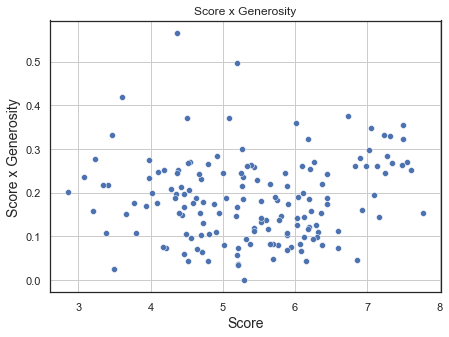

In [10]:
#Não existe relação entre Generosidade e Felicidade da população (fiquei bem surpreso)

fig, ax = plt.subplots(figsize=(7,5))
sns.scatterplot(df["Score"], df["Generosity"], data=df)
ax.set_title("Score x Generosity",fontdict= {'size':12})
ax.xaxis.set_label_text("Score",fontdict= {'size':14})
ax.yaxis.set_label_text("Score x Generosity",fontdict= {'size':14})
plt.grid(True)
plt.show()

fig.savefig("plot/Generosity.png")

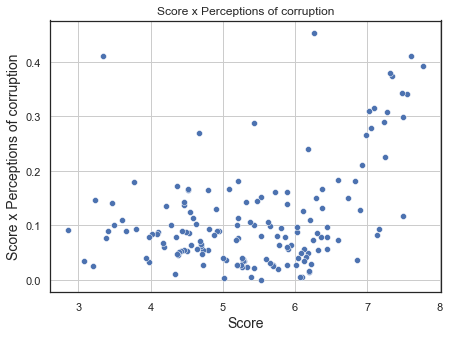

In [11]:
# A Percepções de Corrupção também não possui relação com a Felicidade
fig, ax = plt.subplots(figsize=(7,5))
sns.scatterplot(df["Score"], df["Perceptions of corruption"], data=df)
ax.set_title("Score x Perceptions of corruption",fontdict= {'size':12})
ax.xaxis.set_label_text("Score",fontdict= {'size':14})
ax.yaxis.set_label_text("Score x Perceptions of corruption",fontdict= {'size':14})
plt.grid(True)
plt.show()

fig.savefig("plot/Perceptions of corruption.png")

In [12]:
df

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393
1,2,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410
2,3,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341
3,4,Iceland,7.494,1.380,1.624,1.026,0.591,0.354,0.118
4,5,Netherlands,7.488,1.396,1.522,0.999,0.557,0.322,0.298
...,...,...,...,...,...,...,...,...,...
151,152,Rwanda,3.334,0.359,0.711,0.614,0.555,0.217,0.411
152,153,Tanzania,3.231,0.476,0.885,0.499,0.417,0.276,0.147
153,154,Afghanistan,3.203,0.350,0.517,0.361,0.000,0.158,0.025
154,155,Central African Republic,3.083,0.026,0.000,0.105,0.225,0.235,0.035


In [13]:
# Importando o módulo de regressão linear 
from sklearn.linear_model import LinearRegression


In [14]:
# Não quero o Score, Overall rank e Country or region como variáveis preditoras
X = df.drop('Score', axis = 1)
X = X.drop('Overall rank', axis = 1)
X = X.drop('Country or region', axis = 1)
X.head()

,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,1.340,1.587,0.986,0.596,0.153,0.393
1,1.383,1.573,0.996,0.592,0.252,0.410
2,1.488,1.582,1.028,0.603,0.271,0.341
3,1.380,1.624,1.026,0.591,0.354,0.118
4,1.396,1.522,0.999,0.557,0.322,0.298


In [15]:
# Definindo Y
Y = df.Score

In [16]:
# Criando o objeto de regressão linear
modelo1 = LinearRegression()

In [17]:
# Treinando o modelo
modelo1.fit(X, Y)

LinearRegression()

In [18]:
# Coeficientes
print("Coeficiente: ", modelo1.intercept_)
print("Número de Coeficientes: ", len(modelo1.coef_))

Coeficiente:  1.7952202293072834
Número de Coeficientes:  6


In [19]:
#prevendo os Scores com os mesmos dados de entrada que foram usados para treinar o modelo (não é o ideal)
modelo1.predict(X)

array([7.00548205, 7.09306376, 7.17731778, 6.94501295, 6.92351457,
       7.06525159, 6.95868603, 7.04424212, 6.95437379, 6.72892047,
       6.9711455 , 6.22791333, 6.27700529, 6.96405331, 6.72704049,
       6.97849222, 6.66413664, 6.57113692, 6.40865675, 6.16512153,
       6.4980305 , 6.74004766, 5.77761706, 6.46988157, 6.17242995,
       5.89019787, 5.58629639, 6.07191313, 6.59362701, 6.28403234,
       6.14489939, 5.75556477, 6.24322562, 7.27101859, 5.40084237,
       6.03415894, 6.33986851, 5.96075088, 5.99642887, 6.10858678,
       6.21589364, 5.82545397, 5.81610674, 6.45672577, 5.5774195 ,
       5.52690417, 5.96777789, 5.68831981, 5.99640989, 5.783934  ,
       6.19331847, 6.09944625, 5.72101434, 5.66280225, 6.34154324,
       5.78954434, 5.9882577 , 6.40970021, 5.50913636, 5.94730664,
       5.38997059, 5.55288356, 5.86974885, 6.16315029, 5.62138327,
       6.21411339, 4.55138525, 5.68375959, 5.55599972, 5.56446617,
       5.06110841, 5.61325794, 5.5131565 , 5.00453559, 5.60972

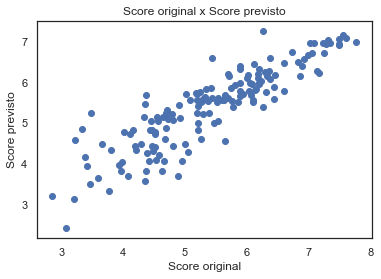

In [20]:
# Comparando Score original x Score previsto
plt.scatter(df.Score, modelo1.predict(X))
plt.xlabel("Score original")
plt.ylabel("Score previsto")
plt.title("Score original x Score previsto")
plt.show()

In [21]:
# calculando o MSE (Mean Squared Error)
mse1 = np.mean((df.Score - modelo1.predict(X)) ** 2)
print(mse1)

0.27186995749127074


In [22]:
# MODELO 2 Considerando apenas Healthy life expectancy, Social support e GDP per capita

# Não quero o Score, Overall rank e Country or region como variáveis preditoras
X = df.drop('Score', axis = 1)
X = X.drop('Overall rank', axis = 1)
X = X.drop('Country or region', axis = 1)
X = X.drop('Freedom to make life choices', axis = 1)
X = X.drop('Generosity', axis = 1)
X = X.drop('Perceptions of corruption', axis = 1)

X.head()



,GDP per capita,Social support,Healthy life expectancy
0,1.340,1.587,0.986
1,1.383,1.573,0.996
2,1.488,1.582,1.028
3,1.380,1.624,1.026
4,1.396,1.522,0.999


In [23]:
#Criando e treinando o modelo 2
modelo2 = LinearRegression()
modelo2.fit(X, Y)


LinearRegression()

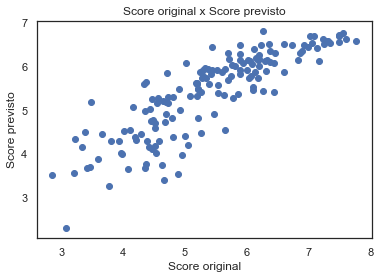

In [24]:
# Comparando Score original x Score previsto
plt.scatter(df.Score, modelo2.predict(X))
plt.xlabel("Score original")
plt.ylabel("Score previsto")
plt.title("Score original x Score previsto")
plt.show()

In [25]:
# calculando o MSE (Mean Squared Error) para o modelo 2
mse2 = np.mean((df.Score -  modelo2.predict(X)) ** 2)
print(mse2)

#O erro para o modelo considerando apenas 3 variáveis foi maior que o modelo considerando 6 variáveis, mesmo que as 3 variáveis
#retiradas não tivessem, APARENTEMENTE, relação com o Score


0.3369194564381561


In [26]:
#separando os dados para TREINO e TESTE

In [27]:
# Reconstruindo o X usado no Modelo 1
X = df.drop('Score', axis = 1)
X = X.drop('Overall rank', axis = 1)
X = X.drop('Country or region', axis = 1)
X.head()

,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,1.340,1.587,0.986,0.596,0.153,0.393
1,1.383,1.573,0.996,0.592,0.252,0.410
2,1.488,1.582,1.028,0.603,0.271,0.341
3,1.380,1.624,1.026,0.591,0.354,0.118
4,1.396,1.522,0.999,0.557,0.322,0.298


In [28]:
# Para dividir os datasets randomicamente
from sklearn.model_selection import train_test_split

In [29]:
# Dividindo X e Y em dados de treino e de teste
X_treino, X_teste, Y_treino, Y_teste = train_test_split(X, Y, test_size = 0.30, random_state = 5)

In [30]:
# Construindo um modelo de regressão
modelo3 = LinearRegression()

In [31]:
# Treinando o modelo (somente os X e Y de treino)
modelo3.fit(X_treino, Y_treino)

LinearRegression()

In [32]:
# Definindo os dados teste
pred_teste_modelo3 = modelo3.predict(X_teste)

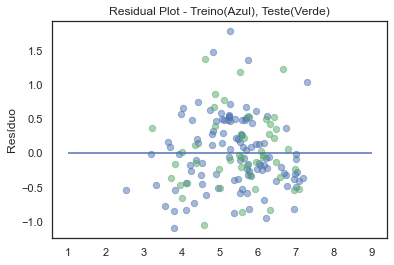

In [69]:
plt.scatter(modelo3.predict(X_treino), modelo3.predict(X_treino) - Y_treino, c = 'b', s = 40, alpha = 0.5)
plt.scatter(modelo3.predict(X_teste), modelo3.predict(X_teste) - Y_teste, c = 'g', s = 40, alpha = 0.5)
plt.hlines(y = 0, xmin = 1, xmax = 9)
plt.ylabel("Resíduo")
plt.title("Residual Plot - Treino(Azul), Teste(Verde)")
plt.show()

In [35]:
modelo3.predict([[1.34, 1.587, 0.986, 0.596, 0.153, 0.393]])

array([6.95314835])